In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/omar.elkhawass/Downloads/Covid Data.csv")
print(df.shape)
df.head()

(1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
#checking for null values 
df.isnull().sum().sum()

0

In [5]:
#analyzing unique values 
for i in df.columns:
    print(i, ':', len(df[i].unique()))  

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
DATE_DIED : 401
INTUBED : 4
PNEUMONIA : 3
AGE : 121
PREGNANT : 4
DIABETES : 3
COPD : 3
ASTHMA : 3
INMSUPR : 3
HIPERTENSION : 3
OTHER_DISEASE : 3
CARDIOVASCULAR : 3
OBESITY : 3
RENAL_CHRONIC : 3
TOBACCO : 3
CLASIFFICATION_FINAL : 7
ICU : 4


In [6]:
df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [7]:
#for DATE_DIED, there are 971,633 9999-99-99 values which represent those who did not die
#we will include this as a new feature 'DEATH' stating whether patient died or not, and drop DATE_DIED

df['DEATH'] = [2 if each == '9999-99-99' else 1 for each in df['DATE_DIED']]
df = df.drop('DATE_DIED', axis=1)

In [8]:
df['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [9]:
df['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [10]:
df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [11]:
#we can see that some features that should only have 2 unique values seem to have 3. 
#the 3rd value in columns with 3 unique values (ex: 99 in PNEUMONIA) represents NA values 
#therefore, we will only include 1 and 2 in our data 

df = df[(df['PNEUMONIA'] == 1) | (df['PNEUMONIA'] == 2)]
df = df[(df['DIABETES'] == 1) | (df['DIABETES'] == 2)]
df = df[(df['COPD'] == 1) | (df['COPD'] == 2)]
df = df[(df['ASTHMA'] == 1) | (df['ASTHMA'] == 2)]
df = df[(df['INMSUPR'] == 1) | (df['INMSUPR'] == 2)]
df = df[(df['HIPERTENSION'] == 1) | (df['HIPERTENSION'] == 2)]
df = df[(df['OTHER_DISEASE'] == 1) | (df['OTHER_DISEASE'] == 2)]
df = df[(df['CARDIOVASCULAR'] == 1) | (df['CARDIOVASCULAR'] == 2)]
df = df[(df['OBESITY'] == 1) | (df['OBESITY'] == 2)]
df = df[(df['RENAL_CHRONIC'] == 1) | (df['RENAL_CHRONIC'] == 2)]
df = df[(df['TOBACCO'] == 1) | (df['TOBACCO'] == 2)]

Text(0.5, 1.0, 'PREGNANCIES - SEX')

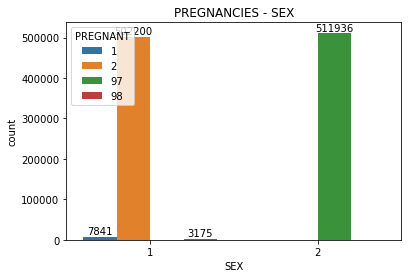

In [13]:
#further look at PREGNANCY
#pregnancy/sex bar plot

ax = sns.countplot(df['SEX'], hue = df['PREGNANT'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('PREGNANCIES - SEX')


In [14]:
#All '97' values are for Males (not pregnant), so we will convert 97 to 2  
df['PREGNANT'] = df['PREGNANT'].replace(97,2)

#Getting rid of missing values 
df = df[(df['PREGNANT'] == 1) | (df['PREGNANT'] == 2)]

Text(0.5, 1.0, 'ICU Count')

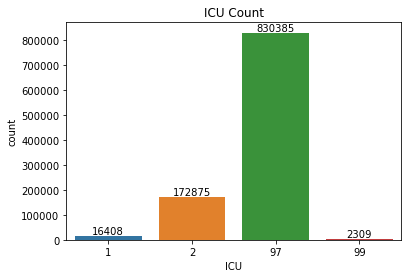

In [15]:
#further look at ICU

ax = sns.countplot(df['ICU'])
plt.bar_label(ax.containers[0])
plt.title('ICU Count')

Text(0.5, 1.0, 'INTUBED count')

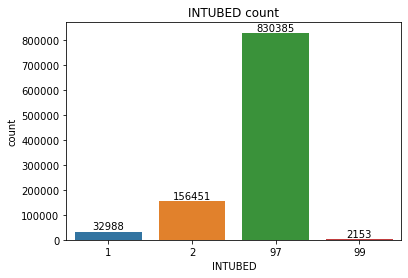

In [16]:
#further look at INTUBED

ax = sns.countplot(df['INTUBED'])
plt.bar_label(ax.containers[0])
plt.title('INTUBED count')

In [17]:
# There are too many missing values in ICU and INTUBED columns, we will drop them 
 
df = df.drop(['ICU', 'INTUBED'], axis=1)

In [18]:
#Re-analyzing unique values 
for i in df.columns:
    print(i, ':', len(df[i].unique()))

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
PNEUMONIA : 2
AGE : 121
PREGNANT : 2
DIABETES : 2
COPD : 2
ASTHMA : 2
INMSUPR : 2
HIPERTENSION : 2
OTHER_DISEASE : 2
CARDIOVASCULAR : 2
OBESITY : 2
RENAL_CHRONIC : 2
TOBACCO : 2
CLASIFFICATION_FINAL : 7
DEATH : 2


In [19]:
#our data is now much more accurate
#we can see that all our features are categorical except for AGE, which is numerical

Text(0.5, 1.0, 'AGE distribution')

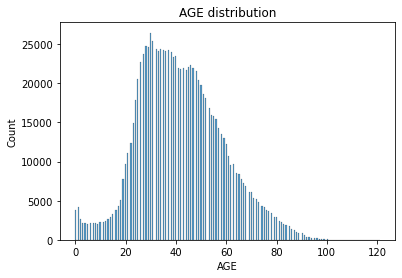

In [20]:
#Lets visualize our data 

#Age distribution 
sns.histplot(df['AGE'])
plt.title('AGE distribution')

Text(0.5, 1.0, 'AGE-DEATH')

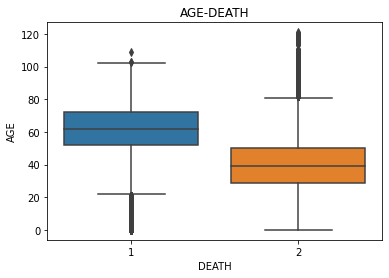

In [21]:
#patients in our dataset are mostly between 20-60 years old 

#Boxplot for AGE-DEATH
sns.boxplot('DEATH', 'AGE', data=df)
plt.title('AGE-DEATH')

Text(0.5, 1.0, 'AGE-DEATH-SEX')

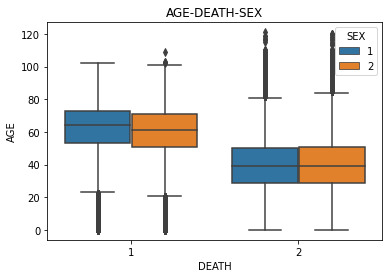

In [22]:
#older patients are more likely to die than younger patients

#Boxplot for AGE-DEATH-SEX
sns.boxplot('DEATH', 'AGE', hue='SEX', data=df)
plt.title('AGE-DEATH-SEX')

Text(0.5, 1.0, 'SEX-DEATH')

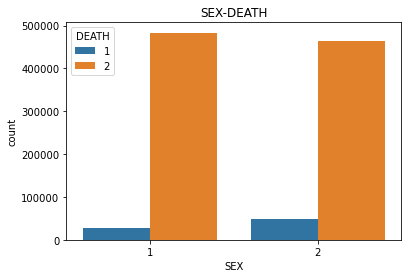

In [23]:
#no major difference bw males and females in terms of death and age

#Lets compare SEX with DEATH 
sns.countplot(df['SEX'], hue=df['DEATH'])
plt.title('SEX-DEATH')

Text(0.5, 1.0, 'TOBACCO-DEATH')

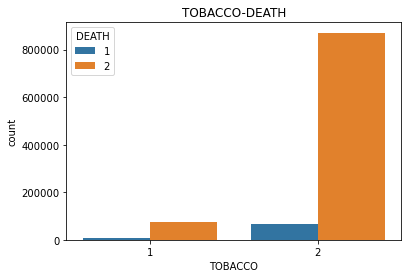

In [24]:
#the likelihood of a male dying from Covid is higher than a female

#Lets compare TOBACCO with DEATH
sns.countplot(df['TOBACCO'], hue=df['DEATH'])
plt.title('TOBACCO-DEATH')

In [25]:
#tobacco users are more likely to die from covid than non tobacco users 

Text(0.5, 1.0, 'Correlation bw Features')

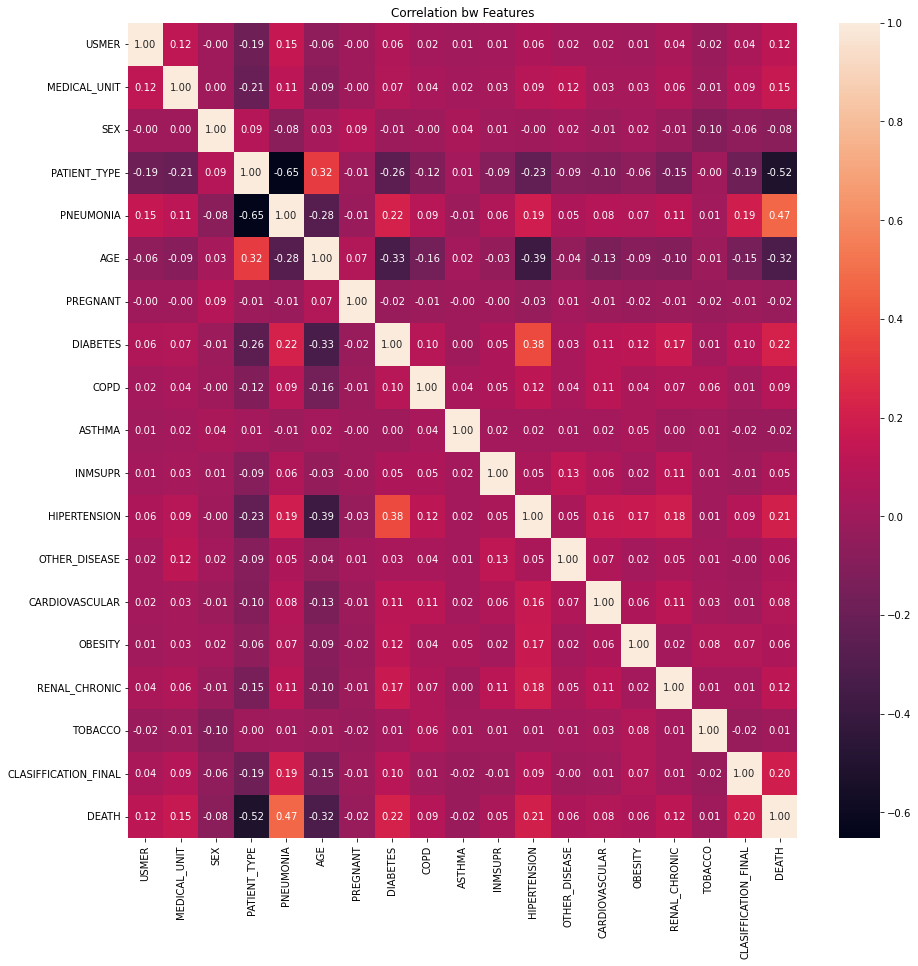

In [26]:
# Lets take a look at correlation and drop features that have low correlation with DEATH 

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation bw Features')

In [27]:
df = df.drop(['SEX','PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','TOBACCO'], axis=1)
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [28]:
#Pre Processing Numerical Feature (AGE)
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
df['AGE'] = scaler.fit_transform(df['AGE'].values.reshape(-1,1))

In [29]:
#Pre Processing non binary Categorical Features (MEDICAL_UNIT, CLASSIFICATION_FINAL)

df = pd.get_dummies(df, columns=['MEDICAL_UNIT','CLASIFFICATION_FINAL'], drop_first=True)

In [30]:
#Splitting to train and test 
from sklearn.model_selection import train_test_split 

X = df.drop('DEATH', axis=1)
Y = df['DEATH']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((715383, 25), (715383,), (306594, 25), (306594,))

In [31]:
#Logistic Regression and accuracy score
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression()
LOG.fit(X_train, Y_train)
LOG.score(X_test, Y_test)

0.9393954219586815

In [32]:
#F1 score 
from sklearn.metrics import f1_score

pred = LOG.predict(X_test)
f1_score(Y_test, pred, average=None)

array([0.52566819, 0.96762977])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

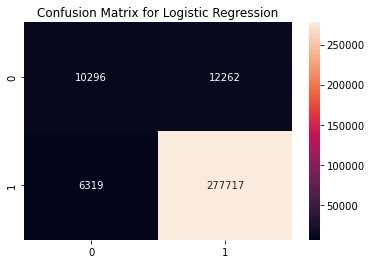

In [33]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 

sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt='.0f')
plt.title('Confusion Matrix for Logistic Regression')

In [34]:
#Although accuracy is high, if we look at the F1 score and the confusion matrix, it shows that the model 
    # predicts survivors accurately, but does not predict patients who died accurately

Text(0.5, 1.0, 'DEATH distribution')

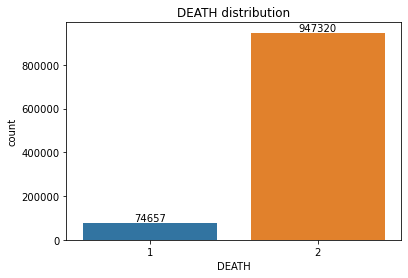

In [35]:
#Let's evaluate if the reason for this is an imbalance in the target column 

ax = sns.countplot(df['DEATH'])
plt.bar_label(ax.containers[0])
plt.title('DEATH distribution')

Text(0.5, 1.0, 'DEATH distribution')

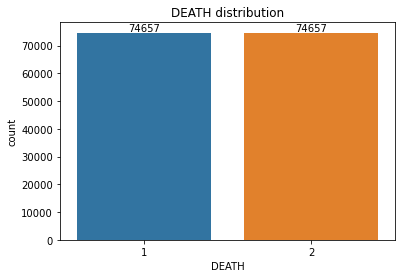

In [36]:
#Clearly there is an imbalance, we will solve by undersampling 
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler()
X_resampled, Y_resampled = RUS.fit_resample(X,Y)

ax = sns.countplot(Y_resampled)
plt.bar_label(ax.containers[0])
plt.title('DEATH distribution')

In [37]:
#Now that the imbalance is resolved, lets re-split the train and test

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((104519, 25), (104519,), (44795, 25), (44795,))

In [38]:
#Logistic Regression with resampled data 

LOG.fit(X_train, Y_train)
LOG.score(X_test, Y_test)

0.9084496037504186

In [39]:
#F1 score with resampled data 

pred2 = LOG.predict(X_test)
f1_score(Y_test, pred2, average=None)

array([0.90957998, 0.90729061])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

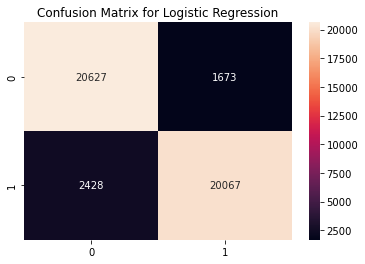

In [40]:
#Confusion Matrix with resampled data 

sns.heatmap(confusion_matrix(Y_test, pred2), annot=True, fmt='.0f')
plt.title('Confusion Matrix for Logistic Regression')

In [41]:
#The model is now more accurate after resolving the target column imbalance issue

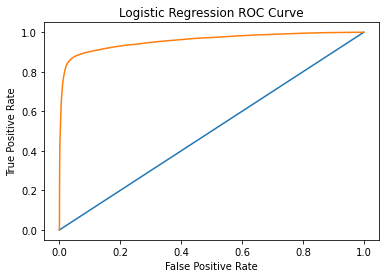

In [42]:
#Logistic Regression ROC Curve 
from sklearn.metrics import roc_curve 

Y_test = Y_test.replace({2:1, 1:0})

LOG_pred_probability = LOG.predict_proba(X_test)
FPR, TPR, thresholds = roc_curve(Y_test, LOG_pred_probability[:,1])
plt.plot([0,1],[0,1])
plt.plot(FPR, TPR)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [43]:
#we can see that the performance of this model is great by analyzing the ROC curve